### **-- ADCC DATA ANALYSIS --**
*By Matheus Barbosa*

In [2]:
data_path = '/content/drive/MyDrive/DA - PROJECTS/BJJ - ADCC/adcc_historical_data.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_bjj = pd.read_csv(data_path, sep=';')
pd.set_option('display.max_columns', None)

In [4]:
# Visualizing the data frame
# This is the first thing that everyone does when it comes to analyze data. You should take a look at the dataframe and see how data is inputed, terms, values, etc.

df_bjj

,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,adv_pen,weight_class,sex,stage,year
0,3314,484,Murilo Santana,733,Vinicius Magalhaes,DECISION,NaN,-1,-1,NaN,ABS,M,4F,2011
1,35049,7507,Nicholas Meregali,9554,Henrique Cardoso,SUBMISSION,Kimura,-1,-1,NaN,99KG,M,R1,2022
2,35053,7507,Nicholas Meregali,1740,Yuri Simoes,DECISION,NaN,-1,-1,NaN,99KG,M,4F,2022
3,35057,7507,Nicholas Meregali,576,Rafael Lovato Jr,POINTS,NaN,0,0,PEN,99KG,M,3RD,2022
4,35096,7507,Nicholas Meregali,11797,Giancarlo Bodoni,POINTS,NaN,6,2,NaN,ABS,M,4F,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,368,6438,Hayato Sakurai,6167,Ricco Rodriguez,SUBMISSION,Heel hook,-1,-1,NaN,ABS,M,SF,1999
1024,818,-1,A. Cacareco,559,Rodrigo Medeiros,SUBMISSION,Guillotine,-1,-1,NaN,ABS,M,R2,2003
1025,341,-1,Jeff Monson,481,Saulo Ribeiro,POINTS,NaN,-1,-1,NaN,99KG,M,F,1999
1026,35076,1119,Beatriz Mesquita,9271,Mayssa Bastos,POINTS,NaN,3,0,NaN,60KG,F,4F,2022


In [5]:
# Understanding the format of data its type and how you should deal with it.
df_bjj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       1028 non-null   int64 
 1   winner_id      1028 non-null   int64 
 2   winner_name    1028 non-null   object
 3   loser_id       1028 non-null   int64 
 4   loser_name     1028 non-null   object
 5   win_type       1028 non-null   object
 6   submission     400 non-null    object
 7   winner_points  1028 non-null   int64 
 8   loser_points   1028 non-null   int64 
 9   adv_pen        29 non-null     object
 10  weight_class   1028 non-null   object
 11  sex            1028 non-null   object
 12  stage          1028 non-null   object
 13  year           1028 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 112.6+ KB


In [6]:
# Athletes who most won fights
# Here i'm making a simple query: "What are the athletes who most won fights in history?"
# This is not yet about who's the most final or super fight winner.

df_bjj['winner_name'].value_counts().head(10).reset_index()

,winner_name,count
0,Alexandre Ribeiro,30
1,Marcelo Garcia,27
2,Saulo Ribeiro,22
3,Andre Galvao,22
4,Leonardo Vieira,21
5,Gordon Ryan,20
6,Fabricio Werdum,20
7,Roberto Abreu,20
8,Pablo Popovitch,19
9,Vinicius Magalhaes,19


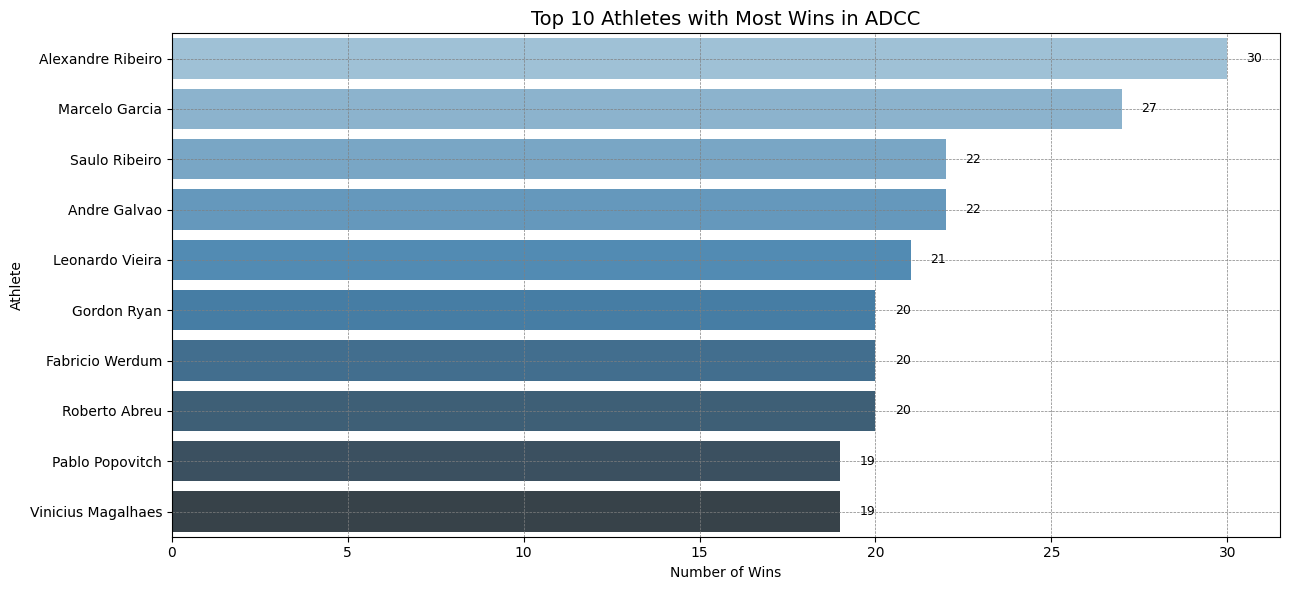

In [18]:
# Since a have this table above which is an answer to the question i can use it to build a visualization graphic!
# Using libraries such as matplotlib and Seaborn

top10_winners = df_bjj['winner_name'].value_counts().head(10).reset_index()
top10_winners.columns = ['winner_name', 'win_count']

# Plot
plt.figure(figsize=(13, 6))
sns.barplot(
    data=top10_winners,
    y='winner_name',
    x='win_count',
    hue='winner_name',
    palette='Blues_d',
    dodge=False,
    legend=False
)
# Costumizing/Stlyling graph
plt.title('Top 10 Athletes with Most Wins in ADCC', fontsize=14)
plt.xlabel('Number of Wins')
plt.ylabel('Athlete')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
for i, value in enumerate(top10_winners['win_count']):
    plt.text(value + 1, i, str(value), ha='right', va='center', fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
# Percentage of 'win type'
# Now the question is: "What is the proportion (%) of win types among all these matches?"

win_type_percentage = (df_bjj['win_type'].value_counts(normalize=True) * 100).round(2)
print("Win type percentage:")
print(win_type_percentage)

Win type percentage:
win_type
POINTS              50.58
SUBMISSION          39.11
DECISION             9.44
INJURY               0.78
DESQUALIFICATION     0.10
Name: proportion, dtype: float64


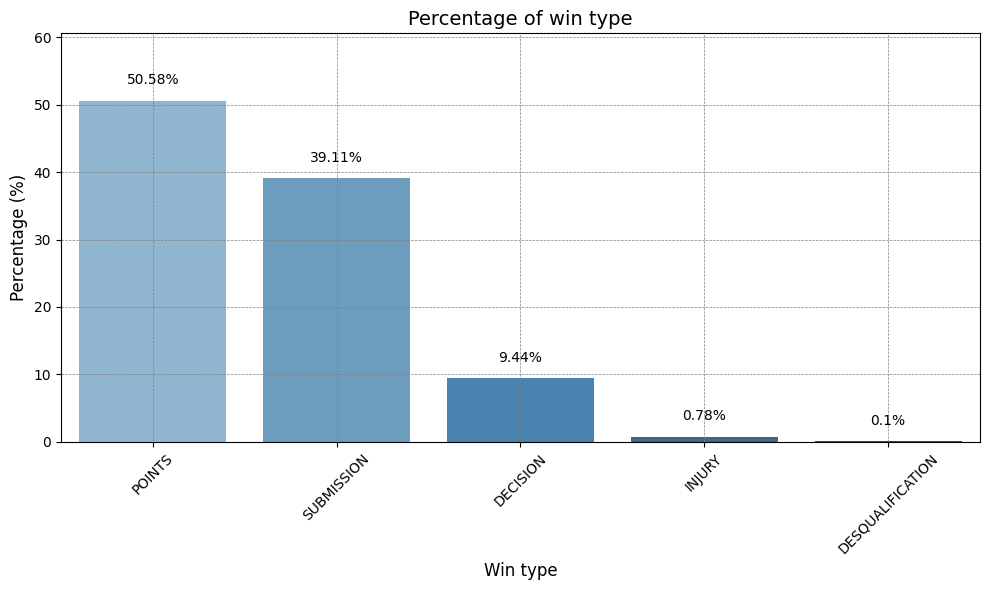

In [15]:
# Since a have this table above which is an answer to the question i can use it to build a visualization graphic!
# Using libraries such as matplotlib and Seaborn

win_type_percentage = (df_bjj['win_type'].value_counts(normalize=True) * 100).round(2)

# Bar graph
plt.figure(figsize=(10,6))
sns.barplot(
    x=win_type_percentage.index,
    y=win_type_percentage.values,
    hue=win_type_percentage.index,
    palette='Blues_d',
    legend=False
)

# Title and labels
plt.title('Percentage of win type', fontsize=14)
plt.xlabel('Win type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, win_type_percentage.max() + 10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

for i, v in enumerate(win_type_percentage):
    plt.text(i, v + 2, str(v) + '%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Most Common Submissions
# Well! When talking about grappling the "goal" is to submit! "What is the top 10 most common submissions?"

df_bjj['submission'].value_counts().head(10).reset_index()

,submission,count
0,RNC,99
1,Armbar,68
2,Guillotine,34
3,Heel hook,32
4,Triangle,24
5,Footlock,18
6,Kneebar,17
7,Kimura,13
8,Inside heel hook,11
9,Choke,11


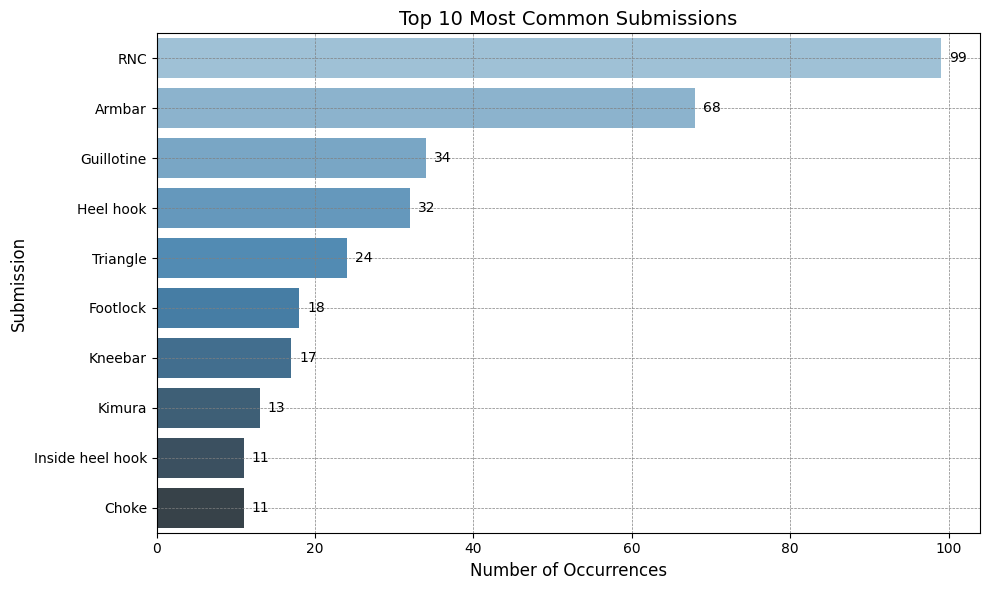

In [16]:
# Since a have this table above which is an answer to the question i can use it to build a visualization graphic!
# Using libraries such as matplotlib and Seaborn

top_submissions = df_bjj['submission'].value_counts().head(10).reset_index()
top_submissions.columns = ['Submission', 'Count']

# Plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(
    x='Count',
    y='Submission',
    data=top_submissions,
    hue='Submission',  # Adding 'hue' to respect future Seaborn behavior
    palette='Blues_d',
    legend=False  # Disabling the legend
)

# Titles and labels
plt.title('Top 10 Most Common Submissions', fontsize=14)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Submission', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


for i, v in enumerate(top_submissions['Count']):
    plt.text(v + 1, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# The big question for me was: "Being a winner in match numbers is not enough! win finals and super fights is where the prestige is! So...where are the great champions at ADCC (till 2022)"

# Filter male matches that are either finals or superfights
important_stages = ['F', 'SPF']
male_important_finals = df_bjj[(df_bjj['sex'] == 'M') & (df_bjj['stage'].isin(important_stages))]

# Get top 10 male athletes with most wins in those stages
top10_male_winners = male_important_finals['winner_name'].value_counts().head(10).index.tolist()

# Filter matches with those top 10 athletes
top10_matches = male_important_finals[male_important_finals['winner_name'].isin(top10_male_winners)]

# Group by athlete and collect the years they won
winners_years = top10_matches.groupby('winner_name')['year'].apply(list).reset_index()

# Add number of wins
winners_years['wins'] = winners_years['year'].apply(len)

# Sort by number of wins
winners_years = winners_years.sort_values(by='wins', ascending=False)

print("Top male athletes with most final wins (including Super Fights):")
print(winners_years)

Top male athletes with most final wins (including Super Fights):
         winner_name                                  year  wins
0       Andre Galvao  [2011, 2011, 2013, 2015, 2019, 2017]     6
3        Gordon Ryan        [2017, 2019, 2022, 2019, 2022]     5
5     Marcelo Garcia              [2005, 2007, 2011, 2003]     4
4  Jose Mario Sperry              [2011, 2013, 1999, 1998]     4
6      Ricardo Arona              [2001, 2001, 2000, 2003]     4
1     Braulio Estima                    [2009, 2011, 2009]     3
2        Dean Lister                    [2011, 2005, 2003]     3
7      Royler Gracie                    [1999, 2000, 2001]     3
8     Rubens Charles                    [2015, 2013, 2017]     3
9        Yuri Simoes                    [2015, 2017, 2022]     3


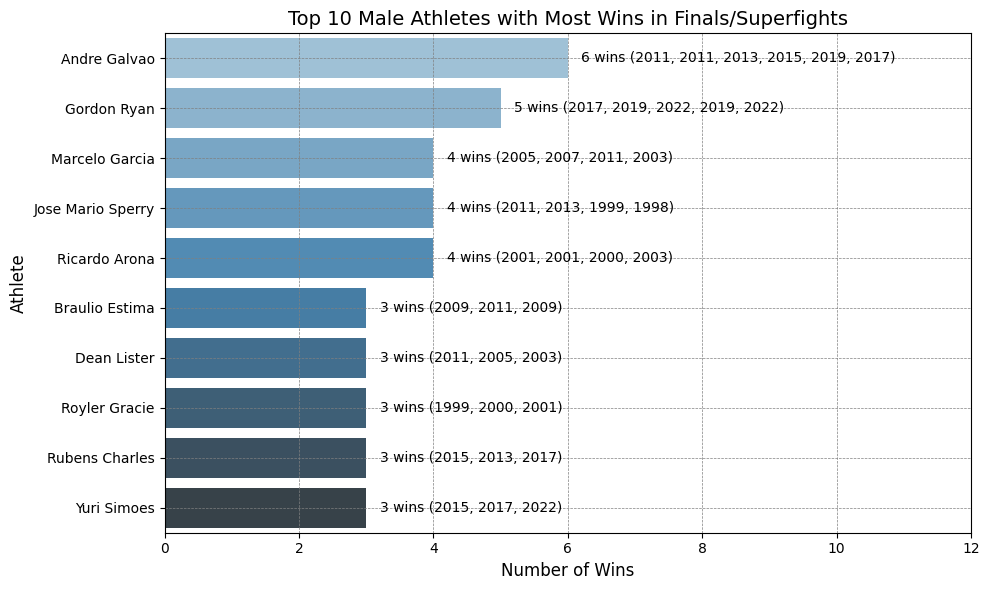

In [19]:
# Since a have this table above which is an answer to the question i can use it to build a visualization graphic!
# Using libraries such as matplotlib and Seaborn

important_stages = ['F', 'SPF']
male_important_finals = df_bjj[(df_bjj['sex'] == 'M') & (df_bjj['stage'].isin(important_stages))]
top10_male_winners = male_important_finals['winner_name'].value_counts().head(10).index.tolist()
top10_matches = male_important_finals[male_important_finals['winner_name'].isin(top10_male_winners)]
winners_years = top10_matches.groupby('winner_name')['year'].apply(list).reset_index()
winners_years['wins'] = winners_years['year'].apply(len)
winners_years = winners_years.sort_values(by='wins', ascending=False)

# Plotting the top 10 male athletes with the most wins in finals or superfights
plt.figure(figsize=(10, 6))

# Creating the bar plot
sns.barplot(
    x='wins',
    y='winner_name',
    data=winners_years,
    hue='winner_name',
    palette='Blues_d',
    legend=False
)
# Titles and labels
plt.title('Top 10 Male Athletes with Most Wins in Finals/Superfights', fontsize=14)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Athlete', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlim(0, winners_years['wins'].max() + 6)

for i, (v, years) in enumerate(zip(winners_years['wins'], winners_years['year'])):
    plt.text(v + 0.2, i, f'{v} wins ({", ".join(map(str, years))})', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Jiu-jitsu is a sport where the female presence is growing all the time! The question now is: "Where are our winners?"

# Filter male matches that are either finals or superfights
important_stages = ['F', 'SPF']
female_important_finals = df_bjj[(df_bjj['sex'] == 'F') & (df_bjj['stage'].isin(important_stages))]

# Get top 10 male athletes with most wins in those stages
top10_female_winners = female_important_finals['winner_name'].value_counts().head(10).index.tolist()

# Filter matches with those top 10 athletes
top10_matches =female_important_finals[female_important_finals['winner_name'].isin(top10_female_winners)]

# Group by athlete and collect the years they won
winners_years = top10_matches.groupby('winner_name')['year'].apply(list).reset_index()

# Add number of wins
winners_years['wins'] = winners_years['year'].apply(len)

# Sort by number of wins
winners_years = winners_years.sort_values(by='wins', ascending=False)

print("Top female athletes with most final wins (including Super Fights):")
print(winners_years)

Top female athletes with most final wins (including Super Fights):
        winner_name                            year  wins
4  Gabrielle Garcia  [2011, 2013, 2017, 2019, 2011]     5
0         Amy Campo                          [2022]     1
1    Bianca Basilio                          [2019]     1
2   Bianca Mesquita                          [2017]     1
3      Ffion Davies                          [2022]     1
5    Mackenzie Dern                          [2015]     1


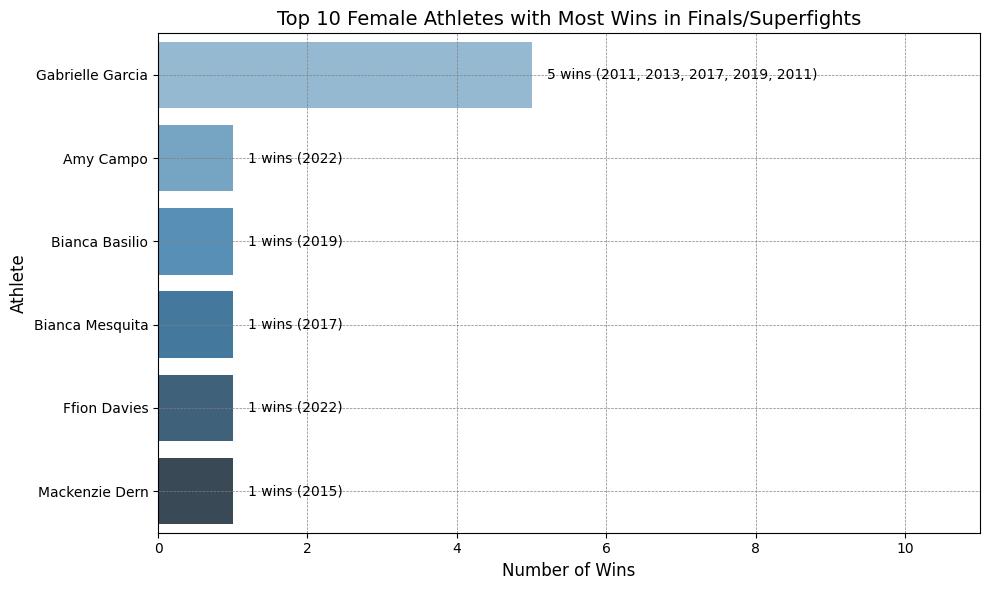

In [20]:
# Since a have this table above which is an answer to the question i can use it to build a visualization graphic!
# Using libraries such as matplotlib and Seaborn

important_stages = ['F', 'SPF']
female_important_finals = df_bjj[(df_bjj['sex'] == 'F') & (df_bjj['stage'].isin(important_stages))]
top10_female_winners = female_important_finals['winner_name'].value_counts().head(10).index.tolist()
top10_matches = female_important_finals[female_important_finals['winner_name'].isin(top10_female_winners)]
winners_years = top10_matches.groupby('winner_name')['year'].apply(list).reset_index()
winners_years['wins'] = winners_years['year'].apply(len)
winners_years = winners_years.sort_values(by='wins', ascending=False)

# Plotting the top 10 female athletes with the most wins in finals or superfights
plt.figure(figsize=(10, 6))

# Creating the bar plot
sns.barplot(
    x='wins',
    y='winner_name',
    data=winners_years,
    hue='winner_name',
    palette='Blues_d',
    legend=False
)

# Titles and labels
plt.title('Top 10 Female Athletes with Most Wins in Finals/Superfights', fontsize=14)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Athlete', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Extending the x-axis to accommodate larger win counts
plt.xlim(0, winners_years['wins'].max() + 6)

for i, (v, years) in enumerate(zip(winners_years['wins'], winners_years['year'])):
    plt.text(v + 0.2, i, f'{v} wins ({", ".join(map(str, years))})', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## That was it! Well thank you for taking your time to go through my analysis and my passion for data and grappling! I hope you had a great time as i did. If you want to connect just contact me at LinkedIn or E-mail! Everything is at my github profile! Bye!